In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, CategoricalNB

In [52]:
#Borrowed from Starter Notebook for challenge
# # function to preprocess our data from train models
def preprocessing_data(data):

    # Convert the following numerical labels from interger to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)
    
    # categorical features to be converted to One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]
    
    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ, drop_first=True)
    
    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    
    # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)
    
    return data     

In [53]:
raw_data = pd.read_csv("/Users/sofiasaldarriagajimenez/Documents/NeueFischeBC/financial_inclusion/data/financial-inclusion-in-africa/Train.csv")
raw_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


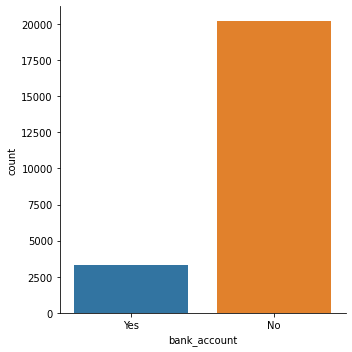

In [54]:
sns.catplot(x="bank_account", kind="count", data= raw_data)

In [48]:
# Convert target label to numerical Data
le = LabelEncoder()
raw_data['bank_account'] = le.fit_transform(raw_data['bank_account'])

#Separate training features from target
X = raw_data.drop(['bank_account'], axis=1)
y = raw_data['bank_account']

processedX = preprocessing_data(X)


In [41]:

X_train, X_test, y_train, y_test = train_test_split(processedX, y, test_size=0.30, stratify = y, random_state=61)


In [57]:
# scale our data into range of 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [35]:
#Decision tree clasifier

# Creating the classifier object 
clf_DT = DecisionTreeClassifier(criterion = "entropy", max_depth=3, min_samples_leaf=5, class_weight = "balanced") 
# Performing training 
clf_DT.fit(X_train, y_train) 

y_predDT = clf_DT.predict(X_test) 

#cmDT = confusion_matrix(y_test, y_predDT)
accDT = accuracy_score(y_test,y_predDT)*100
#crDT = classification_report(y_test, y_predDT)
f1DT = f1_score(y_test, y_predDT)*100

print(f1DT, accDT)

y_pred_train = clf_DT.predict(X_train) 
acc_ = accuracy_score(y_train,y_pred_train)*100
f1_ = f1_score(y_train,y_pred_train)*100

print("train scores",f1_, acc_)



37.732506643046946 70.11901388495325
train scores 38.04484756865709 70.13239402404956


In [36]:
#KNN clasifier
clf_knn = KNeighborsClassifier(n_neighbors=10, weights='uniform', metric='minkowski') 
clf_knn.fit(X_train, y_train) 


y_predKNN = clf_knn.predict(X_test) 

#cm = confusion_matrix(y_test, y_pred)
accKNN = accuracy_score(y_test,y_predKNN)*100
#crKNN = classification_report(y_test, y_predKNN)
f1KNN = f1_score(y_test, y_predKNN)*100

print(f1KNN, accKNN)

42.82744282744282 88.31113629923492


In [37]:
#Random Forest Classifier
# Creating the classifier object 
clf_RF = RandomForestClassifier(n_estimators=1000)
# Performing training 
clf_RF.fit(X_train, y_train) 

y_predRF = clf_RF.predict(X_test) 

#cm = confusion_matrix(y_test, y_pred)
accRF = accuracy_score(y_test,y_predRF)*100
#crRF = classification_report(y_test, y_predRF)
f1RF = f1_score(y_test, y_predRF)*100

print(f1RF, accRF)


46.11016467915957 86.55426466421082


In [61]:

model_mnb = MultinomialNB(alpha=1, fit_prior=True, class_prior=None)

model_mnb.fit(X_train, y_train)

y_train_pred_mnb = model_mnb.predict(X_train)

y_test_pred_mnb = model_mnb.predict(X_test)

confmatMNB = confusion_matrix(y_test, y_test_pred_mnb)
accMNB = accuracy_score(y_test,y_test_pred_mnb)*100
classrepMNB = classification_report(y_test, y_test_pred_mnb)
f1MNB = f1_score(y_test, y_test_pred_mnb)*100

print(f'confusion matrix:\n {confmatMNB}')
print(f'accuracy score: {accMNB:.2f}')
print(f'classification report:\n {classrepMNB}')
print(f'f1 score: {f1MNB:.2f}')


confusion matrix:
 [[5925  139]
 [ 685  309]]
accuracy score: 88.33
classification report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.93      6064
           1       0.69      0.31      0.43       994

    accuracy                           0.88      7058
   macro avg       0.79      0.64      0.68      7058
weighted avg       0.87      0.88      0.86      7058

f1 score: 42.86


In [58]:
model_catnb = CategoricalNB()

model_catnb.fit(X_train, y_train)

#y_train_pred_catnb = model_catnb.predict(X_train)

y_test_pred_catnb = model_catnb.predict(X_test)

confmat_catnb = confusion_matrix(y_test, y_test_pred_catnb)
acc_catnb = accuracy_score(y_test,y_test_pred_catnb)*100
#classrep_catnb = classification_report(y_test, y_test_pred_catnb)
f1_catnb = f1_score(y_test, y_test_pred_catnb)*100

print(f'confusion matrix:\n {confmat_catnb}')
print(f'accuracy score: {acc_catnb:.2f}')
#print(f'classification report:\n {classrep_catnb}')
print(f'f1 score: {f1_catnb:.2f}')

#print("Number of mislabeled points out of a total %d points for test : %d" % (X_test.shape[0], (y_test != y_test_pred_catnb).sum()))
#print("Number of mislabeled points out of a total %d points for training: %d" % (X_train.shape[0], (y_train != y_train_pred_catnb).sum()))

confusion matrix:
 [[5701  363]
 [ 540  454]]
accuracy score: 87.21
f1 score: 50.14


In [59]:
model_svc = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False,
                tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr',
                break_ties=False, random_state=None)

model_svc.fit(X_train, y_train)

#y_train_pred_svc = model_svc.predict(X_train)

y_test_pred_svc = model_svc.predict(X_test)
confmat_svc = confusion_matrix(y_test, y_test_pred_mnb)
acc_svc = accuracy_score(y_test,y_test_pred_svc)*100
#classrep_svc = classification_report(y_test, y_test_pred_mnb)
f1_svc = f1_score(y_test, y_test_pred_svc)*100

print(f'confusion matrix:\n {confmat_svc}')
print(f'accuracy score: {acc_svc:.2f}')
#print(f'classification report:\n {classrep_svc}')
print(f'f1 score: {f1_svc:.2f}')


confusion matrix:
 [[5620  444]
 [ 923   71]]
accuracy score: 88.68
f1 score: 44.32
